In [1]:

# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.0
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.23.1


In [ ]:
# Load libraries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [327]:
path_folder = r"C:\Users\eilon.eilstein\Desktop\Eilon\SQL\PlayStudios_Home_Task\Data\\"

df_vc = pd.read_csv(path_folder+'video_count.csv')#.set_index('video_id')
df_vf = pd.read_csv(path_folder+'video_features.csv')#.set_index('video_id')
df_vf['video_quality'] = df_vf['video_quality'].apply(lambda x: x[:-1])

df_vf[df_vf.video_id == 70]

,video_id,video_length,video_language,video_upload_date,video_quality
69,70,18,english,03/09/2017,480


In [328]:
import datetime as dt



df_joined = df_vc.merge(df_vf, left_on='video_id', right_on='video_id', how='left')#.drop(columns=['video_id_FEAT'])
df_joined['date'] = pd.to_datetime(df_joined.date, format='%d/%m/%Y')
df_joined['week_start_date'] = df_joined.date - pd.to_timedelta((df_joined['date'].dt.dayofweek + 1) % 7, unit='d')
df_joined['video_upload_date'] = pd.to_datetime(df_joined.video_upload_date)
df_joined['days_from_upload'] = df_joined.date - df_joined.video_upload_date
df_joined['days_from_upload'] = df_joined['days_from_upload'].apply(lambda x: float(x.days))
df_joined.sort_values('date')
# df_joined.dtypes
df_joined[df_joined.video_id == 70]

,video_id,date,count,CLASS,video_length,video_language,video_upload_date,video_quality,week_start_date,days_from_upload
2956,70,2017-12-28,51,NaN,18,english,2017-03-09,480,2017-12-24,294.0
3185,70,2018-01-01,52,NaN,18,english,2017-03-09,480,2017-12-31,298.0
3433,70,2017-12-18,54,NaN,18,english,2017-03-09,480,2017-12-17,284.0
3761,70,2017-12-07,57,NaN,18,english,2017-03-09,480,2017-12-03,273.0
4288,70,2017-12-22,61,NaN,18,english,2017-03-09,480,2017-12-17,288.0
...,...,...,...,...,...,...,...,...,...,...
11401,70,2017-09-04,138,NaN,18,english,2017-03-09,480,2017-09-03,179.0
11568,70,2017-09-14,145,1.0,18,english,2017-03-09,480,2017-09-10,189.0
11569,70,2017-09-24,145,1.0,18,english,2017-03-09,480,2017-09-24,199.0
11633,70,2017-09-07,148,1.0,18,english,2017-03-09,480,2017-09-03,182.0


In [329]:
df_wk_avg = df_joined[['week_start_date', 'count']].groupby('week_start_date')['count'].mean()
df_wk_avg.head(6)

week_start_date
2017-09-03    101.064516
2017-09-10    100.981982
2017-09-17    101.383886
2017-09-24    100.910596
2017-10-01     94.012788
2017-10-08     93.652439
Name: count, dtype: float64

In [330]:
df_joined_with_avg = df_joined.join(df_wk_avg, on='week_start_date', rsuffix='_week_AVG')
df_joined_with_avg['Avg_Offset'] = df_joined_with_avg['count'] - df_joined_with_avg.count_week_AVG
df_joined_with_avg.sort_values('week_start_date')

,video_id,date,count,CLASS,video_length,video_language,video_upload_date,video_quality,week_start_date,days_from_upload,count_week_AVG,Avg_Offset
6974,70,2017-09-03,80,NaN,18,english,2017-03-09,480,2017-09-03,178.0,101.064516,-21.064516
11345,16,2017-09-09,137,NaN,24,spanish,2017-08-09,1080,2017-09-03,31.0,101.064516,35.935484
10177,70,2017-09-05,112,NaN,18,english,2017-03-09,480,2017-09-03,180.0,101.064516,10.935484
2897,32,2017-09-08,50,NaN,29,english,2017-07-09,240,2017-09-03,61.0,101.064516,-51.064516
9627,73,2017-09-03,105,NaN,25,chineese,2017-03-09,480,2017-09-03,178.0,101.064516,3.935484
...,...,...,...,...,...,...,...,...,...,...,...,...
1702,36,2018-02-25,40,NaN,21,chineese,2017-10-30,480,2018-02-25,118.0,39.750000,0.250000
3189,23,2018-02-26,52,NaN,26,spanish,2017-10-29,720,2018-02-25,120.0,39.750000,12.250000
1152,92,2018-02-25,34,NaN,26,english,2017-10-30,240,2018-02-25,118.0,39.750000,-5.750000
878,92,2018-02-26,31,NaN,26,english,2017-10-30,240,2018-02-25,119.0,39.750000,-8.750000


In [331]:
df_joined.groupby('video_language').size()

video_language
chineese    4169
english     3929
spanish     3805
dtype: int64

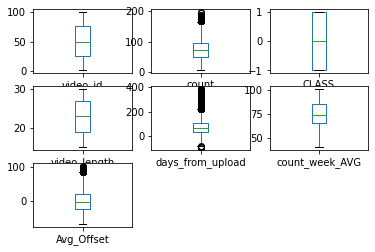

In [332]:
df_joined_with_avg.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

In [333]:
encode = ['video_language']

for col in encode:
    dummy = pd.get_dummies(df_joined_with_avg[col], prefix=col)
    df_joined_with_avg = pd.concat([df_joined_with_avg,dummy], axis=1)
    del df_joined_with_avg[col]
    
cols = ['count', 'video_length', 'video_quality', 'Avg_Offset', 'days_from_upload', 'CLASS', 'video_language_chineese', 'video_language_english', 'video_language_spanish']
df_test = df_joined_with_avg[df_joined_with_avg['CLASS'] > -2][cols]


In [334]:


df_joined_with_avg[cols].loc[500]

count                           25
video_length                    30
video_quality                  360
Avg_Offset                -34.9146
days_from_upload               186
CLASS                          NaN
video_language_chineese          1
video_language_english           0
video_language_spanish           0
Name: 500, dtype: object

In [335]:
# Split-out validation dataset

array = df_test.drop(columns='CLASS').values
X = array[:,0:]
y = df_test['CLASS'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [336]:
X_train[1]

array([72, 28, '1080', -0.39942112879884917, 87.0, 0, 1, 0], dtype=object)

In [337]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [338]:
import random as rd

In [412]:
ind = rd.randint(0, 11000)
data = df_joined_with_avg[cols].drop(columns='CLASS').sort_values('count').loc[ind].values.reshape(1,-1)
print(data, ind)
prediction = clf.predict(data)
prediction

[[76 20 '360' 4.954941860465112 60.0 1 0 0]] 6457


array([0.])

In [432]:
print(dt.datetime.now())
data = df_joined_with_avg[cols].drop(columns='CLASS').sort_values('count').values
data

df_joined_with_avg['Prediction'] = [clf.predict(x.reshape(1, -1)) for x in data]
print(dt.datetime.now())

2021-05-16 17:49:35.792717
2021-05-16 17:51:43.481791


In [428]:
df_joined_with_avg.to_excel(path_folder+'final_df.xlsx')

In [435]:
data = df_joined_with_avg[cols].drop(columns='CLASS').sort_values('count').loc[11031].values.reshape(1,-1)
print(data, ind)
prediction = clf.predict(data)

[[128 21 '1080' 42.04970760233918 34.0 0 1 0]] 6457


In [436]:
prediction

array([1.])